In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import sys

import scipy.stats

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Downloading data

!curl https://s3.amazonaws.com/tripdata/201707-citibike-tripdata.csv.zip > citibike_6.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57.7M  100 57.7M    0     0  15.9M      0  0:00:03  0:00:03 --:--:-- 15.9M


In [3]:
!mv citibike_6.zip $PUIDATA

In [4]:
# !unzip $PUIDATA/citibike_6.zip -d $PUIDATA

In [5]:
# Read in the .csv file

df = pd.read_csv(os.getenv("PUIDATA") + '/201707-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [6]:
# Convert starttime column to date-time variable
df['date'] = pd.to_datetime(df['starttime'])

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,2017-07-01 00:00:00
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,2017-07-01 00:00:03
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,2017-07-01 00:00:08
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,2017-07-01 00:00:11
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,2017-07-01 00:00:15


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [8]:
# Calculating the ages for each rider

df['ageM'] = 2017 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2017 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [9]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'ageM', 'ageF'],
      dtype='object')

In [10]:
# Dropping all irrelevant columns

df.drop(df.columns.difference(['ageM', 'ageF']), axis = 1, inplace = True)

In [11]:
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,ageM,ageF
count,1.069292e+06,383523.000000
mean,3.792710e+01,36.477223
std,1.160460e+01,11.288850
min,1.600000e+01,16.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,1.310000e+02,131.000000


In [12]:
# Dropping the NaN values

df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

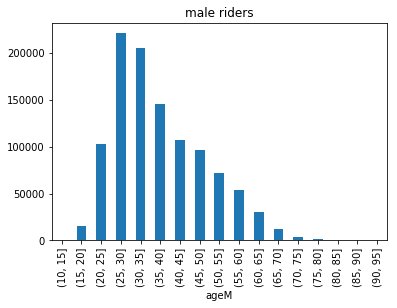

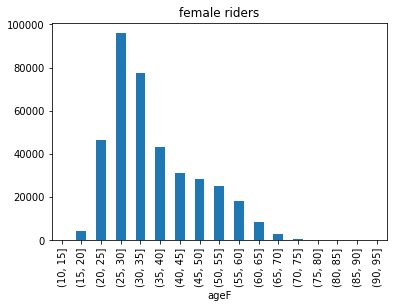

In [13]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


Figure 1: The above graphs show bins by ages for male and female Citibike riders.  The bins represent 5 year age groups.

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.003708
(20, 25]       0.021178
(25, 30]       0.064481
(30, 35]       0.074364
(35, 40]       0.050830
(40, 45]       0.031828
(45, 50]       0.015881
(50, 55]       0.013640
(55, 60]       0.011364
(60, 65]       0.005634
(65, 70]       0.001930
(70, 75]       0.000321
(75, 80]       0.000150
(80, 85]       0.000041
(85, 90]       0.000078
(90, 95]       0.000000


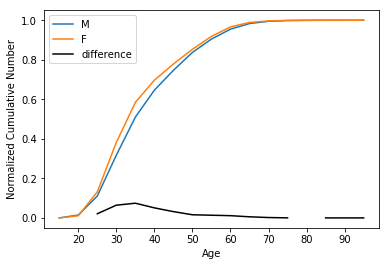

In [14]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# K-S Test for Correlation

Null Hypothesis: The sample distribution of ages for females and the sample distribution of ages for males both come from different population distributions. Alpha = 0.05

Alternative Hypothesis: The sample distribution of ages for females and the sample distribution of ages for males both come from the same population distribution. Alpha  = 0.05

In [15]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.079041094892743857, pvalue=0.0)


In [16]:
# Performing the K-S Test once again, while removing NaN values

ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print(ks)

Ks_2sampResult(statistic=0.079041094892743857, pvalue=0.0)


The p-value is so small Python outputs it as 0.  With this we can reject the null hypothesis.  The sample distributions come from the same population distribution.

# Pearson's test for correlation

Null Hypothesis: The two samples are not correlated. Alpha = 0.05
Alternative Hypothesis: The two samples are correlated. Alpha = 0.05

In [21]:
# The following code produced an error I was unable to resolve.  
# As such, I couldn't perform the Pearson's and Spearman's tests.

np.random.seed(1888)
#alpha=0.05

# wrangling the data to perform the Person's test
len_m = len(df.ageM[~np.isnan(df.ageM)])
len_f = len(df.ageF[~np.isnan(df.ageF)])

print(len_m)
print(len_f)

malesub=df.ageM[~np.isnan(df.ageM)].iloc[np.random.choice(range(len(df.ageF[~np.isnan(df.ageF)])), replace=False)]

par = scipy.stats.pearsonr(np.sort(malesub), np.sort(df.ageF[~np.isnan(df.ageF)]))
print(par)

#print("The Null hypothesis that the two samples are generated from uncorrelated distributions is rejected with p = %.3f. < alpha of .05"%par[1])

1069292
383523


ValueError: axis(=-1) out of bounds

# Spearman's test for correlation

In [18]:
### alpha=0.05
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
spear=scipy.stats.spearmanr(np.sort(malesub), np.sort(df.ageF[~np.isnan(df.ageF)]))
print(spear)
print("The NULL hypothesis that the samples were generated from two uncorrelated distributions is rejected with p = %.3f < .05"%spear[1])